Siamdhani Nurcahyo

siamdhani.nurcahyo1@gmail.com

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#df = pd.read_csv('jena_climate_2009_2016.csv')
df = pd.read_csv('Energy_Usage.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  object 
 7   NOTES       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 4.3+ MB


In [ ]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [ ]:
#
#df.drop('Tpot (K)',inplace = True,axis = 1)
df.drop(df.iloc[:, 2:], inplace=True, axis=1)

In [ ]:
df.drop('TYPE',inplace = True,axis = 1)
df

,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
4,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN
8,10/22/2016,2:00,2:14,0.02,kWh,$0.00,NaN
12,10/22/2016,3:00,3:14,0.01,kWh,$0.00,NaN
16,10/22/2016,4:00,4:14,0.01,kWh,$0.00,NaN
20,10/22/2016,5:00,5:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...
70348,10/24/2018,19:00,19:14,0.03,kWh,$0.01,NaN
70352,10/24/2018,20:00,20:14,0.03,kWh,$0.01,NaN
70356,10/24/2018,21:00,21:14,0.03,kWh,$0.01,NaN
70360,10/24/2018,22:00,22:14,0.02,kWh,$0.00,NaN


In [ ]:
df = df[4::4]
df

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN
8,Electric usage,10/22/2016,2:00,2:14,0.02,kWh,$0.00,NaN
12,Electric usage,10/22/2016,3:00,3:14,0.01,kWh,$0.00,NaN
16,Electric usage,10/22/2016,4:00,4:14,0.01,kWh,$0.00,NaN
20,Electric usage,10/22/2016,5:00,5:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...,...
70348,Electric usage,10/24/2018,19:00,19:14,0.03,kWh,$0.01,NaN
70352,Electric usage,10/24/2018,20:00,20:14,0.03,kWh,$0.01,NaN
70356,Electric usage,10/24/2018,21:00,21:14,0.03,kWh,$0.01,NaN
70360,Electric usage,10/24/2018,22:00,22:14,0.02,kWh,$0.00,NaN


In [ ]:
df.drop(df.index[-1], inplace=True)
df

,DATE,USAGE
4,10/22/2016,0.01
8,10/22/2016,0.02
12,10/22/2016,0.01
16,10/22/2016,0.01
20,10/22/2016,0.01
...,...,...
70344,10/24/2018,0.02
70348,10/24/2018,0.03
70352,10/24/2018,0.03
70356,10/24/2018,0.03


In [ ]:
df

,DATE,USAGE
4,10/22/2016,0.01
8,10/22/2016,0.02
12,10/22/2016,0.01
16,10/22/2016,0.01
20,10/22/2016,0.01
...,...,...
70344,10/24/2018,0.02
70348,10/24/2018,0.03
70352,10/24/2018,0.03
70356,10/24/2018,0.03


In [ ]:
df.shape

(17590, 2)

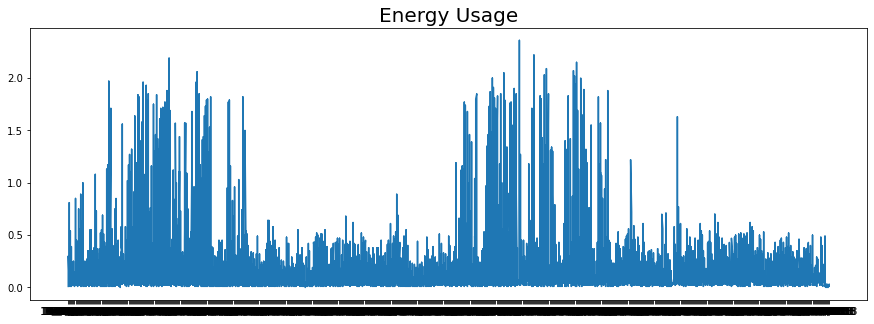

In [ ]:
dates = df['DATE'].values
energy_usage = df['USAGE'].values

plt.figure(figsize=(15,5))
plt.plot(dates, energy_usage)
plt.title('Energy Usage',
          fontsize=20);


In [ ]:
energy_usage

array([0.01, 0.02, 0.01, ..., 0.03, 0.03, 0.02])

In [ ]:
energy_usage_reshape = energy_usage.reshape(-1,1)
energy_usage_reshape

array([[0.01],
       [0.02],
       [0.01],
       ...,
       [0.03],
       [0.03],
       [0.02]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(energy_usage_reshape)
energy_usage_new = scaler.transform(energy_usage_reshape)

In [ ]:
energy_usage_new

array([[0.00423729],
       [0.00847458],
       [0.00423729],
       ...,
       [0.01271186],
       [0.01271186],
       [0.00847458]])

In [ ]:
EU_train, EU_test = train_test_split(energy_usage_new, test_size=0.2,shuffle=False)

In [ ]:
EU_train.shape

(14072, 1)

In [ ]:
EU_test.shape

(3518, 1)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_set = windowed_dataset(EU_train, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(EU_test, window_size=60, batch_size=100, shuffle_buffer=1000)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(4, 1)),
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 4, 60)             14880     
                                                                 
 lstm_10 (LSTM)              (None, 60)                29040     
                                                                 
 dense_13 (Dense)            (None, 30)                1830      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 46,071
Trainable params: 46,071
Non-trai

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(train_set, validation_data=(test_set), epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


141/141 [==============================] - 6s 26ms/step - loss: 0.0056 - mae: 0.0455 - val_loss: 0.0011 - val_mae: 0.0270
Epoch 2/50
141/141 [==============================] - 3s 20ms/step - loss: 0.0051 - mae: 0.0438 - val_loss: 9.5325e-04 - val_mae: 0.0270
Epoch 3/50
141/141 [==============================] - 3s 21ms/step - loss: 0.0049 - mae: 0.0464 - val_loss: 9.1690e-04 - val_mae: 0.0292
Epoch 4/50
141/141 [==============================] - 3s 21ms/step - loss: 0.0048 - mae: 0.0486 - val_loss: 9.2281e-04 - val_mae: 0.0311
Epoch 5/50
141/141 [==============================] - 4s 29ms/step - loss: 0.0048 - mae: 0.0502 - val_loss: 9.3572e-04 - val_mae: 0.0324
Epoch 6/50
141/141 [==============================] - 3s 20ms/step - loss: 0.0048 - mae: 0.0512 - val_loss: 9.4585e-04 - val_mae: 0.0330
Epoch 7/50
141/141 [==============================] - 3s 21ms/step - loss: 0.0048 - mae: 0.0518 - val_loss: 9.5267e-04 - val_mae: 0.0335
Epoch 8/50
141/141 [==============================] - 3s

In [ ]:
threshold_mae = (energy_usage.max() - energy_usage.min()) * 10/100
print(threshold_mae)

0.236


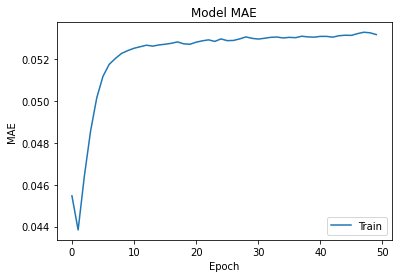

In [ ]:
plt.plot(history.history['mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train'], loc='lower right')
plt.show()

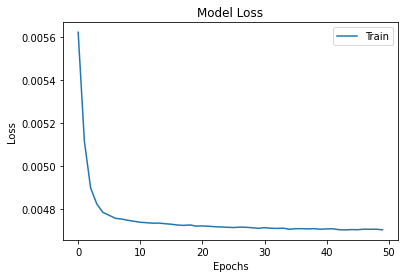

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()